In [1]:
## importing the files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import keras
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [4]:
warnings.filterwarnings('ignore')

In [5]:
#read the dataset

In [6]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Training Dataset.csv')

In [7]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


TASK-2

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
##finding isnull values

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
##Handling missing values

In [12]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married']. mode()[0])
df["Dependents"] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])
df["Loan_Amount_Term"] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df["Credit_History"].mode()[0])

In [13]:
#checked isnull values

In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
##Handling categorical values

In [16]:
df_cat = df.select_dtypes('object').columns

In [17]:

from sklearn.preprocessing import OrdinalEncoder 
oe=OrdinalEncoder() 
df[df_cat]=oe.fit_transform(df[df_cat])

In [18]:
df_cat

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [19]:
lr=LinearRegression()
le=LabelEncoder()

In [20]:
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [21]:
## checking unique values

In [22]:
df['Credit_History'].unique()

array([1., 0.])

In [23]:
df['Education'].unique()

array([0, 1])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    float64
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 62.5 KB


In [25]:
## Handling imbalance data

In [26]:
#Balancing the dataset by using smote
from imblearn.combine import*

In [27]:

SEED=2021
smote = SMOTETomek(random_state=SEED)

In [28]:
## dependent and independent

In [29]:
y = df['Loan_Status']
x = df.drop(columns=['Loan_Status'],axis=1)

In [30]:
x_bal,y_bal = smote.fit_resample(x,y)

In [31]:
print(y.value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64


In [32]:
print(y_bal.value_counts())

1    366
0    366
Name: Loan_Status, dtype: int64


TASK-3

In [33]:
## Descriptive statistical

In [34]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.465798,342.410423,0.855049,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.180967,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [35]:
##visual analysis

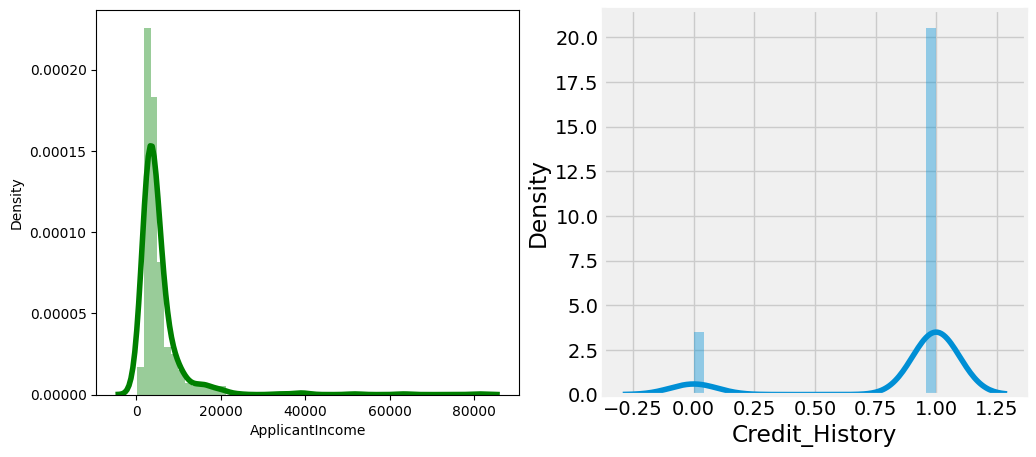

In [36]:
#Univariate anlysis
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.style.use('fivethirtyeight')
sns.distplot(df['ApplicantIncome'], color='g')
plt.subplot(122)
sns.distplot(df['Credit_History'])
plt.show()

In [37]:
##Boxplot

<Axes: >

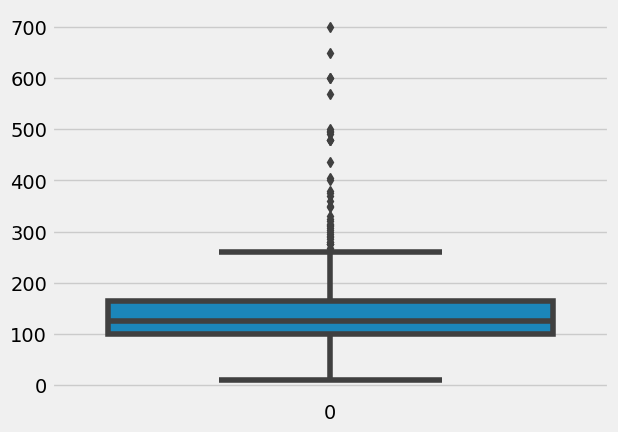

In [38]:
sns.boxplot(df['LoanAmount'])

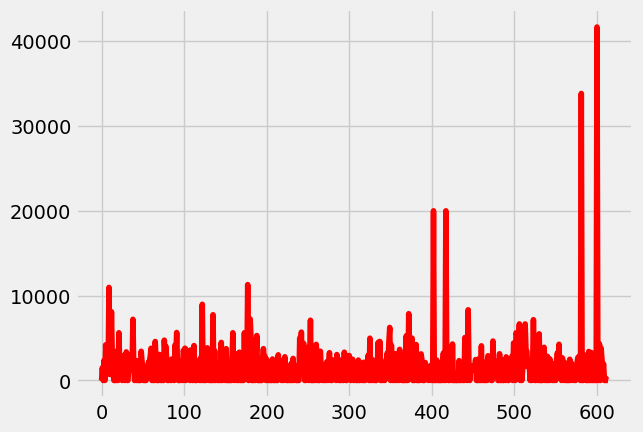

In [39]:
plt.plot(df['CoapplicantIncome'],color='r')

In [40]:
#Bivariate analysis

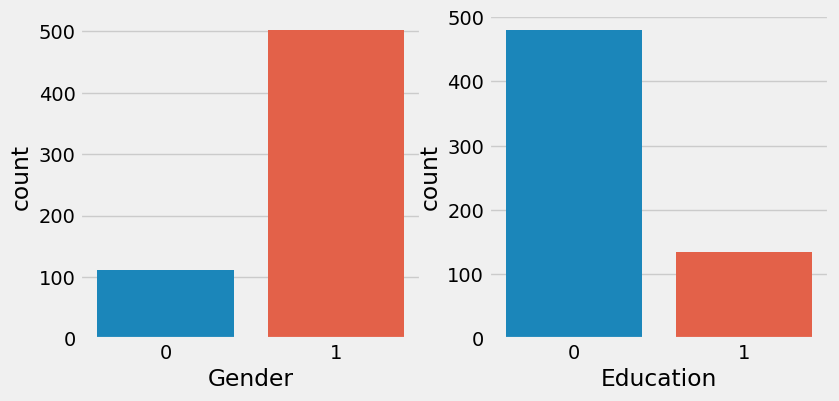

In [41]:

plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(x=df['Gender'])
plt.subplot(1,4,2)
sns.countplot(x=df['Education'])
plt.show()

In [42]:
df['Gender'].value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [43]:
##scatter plot

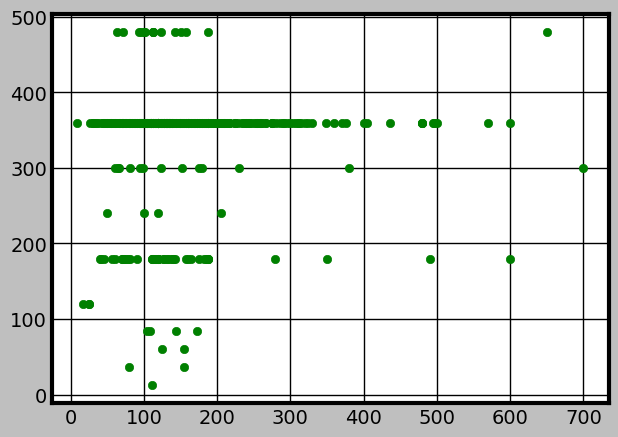

In [44]:
plt.style.use('grayscale')
plt.scatter(df['LoanAmount'],df['Loan_Amount_Term'],color='g')

<Axes: xlabel='Property_Area', ylabel='count'>

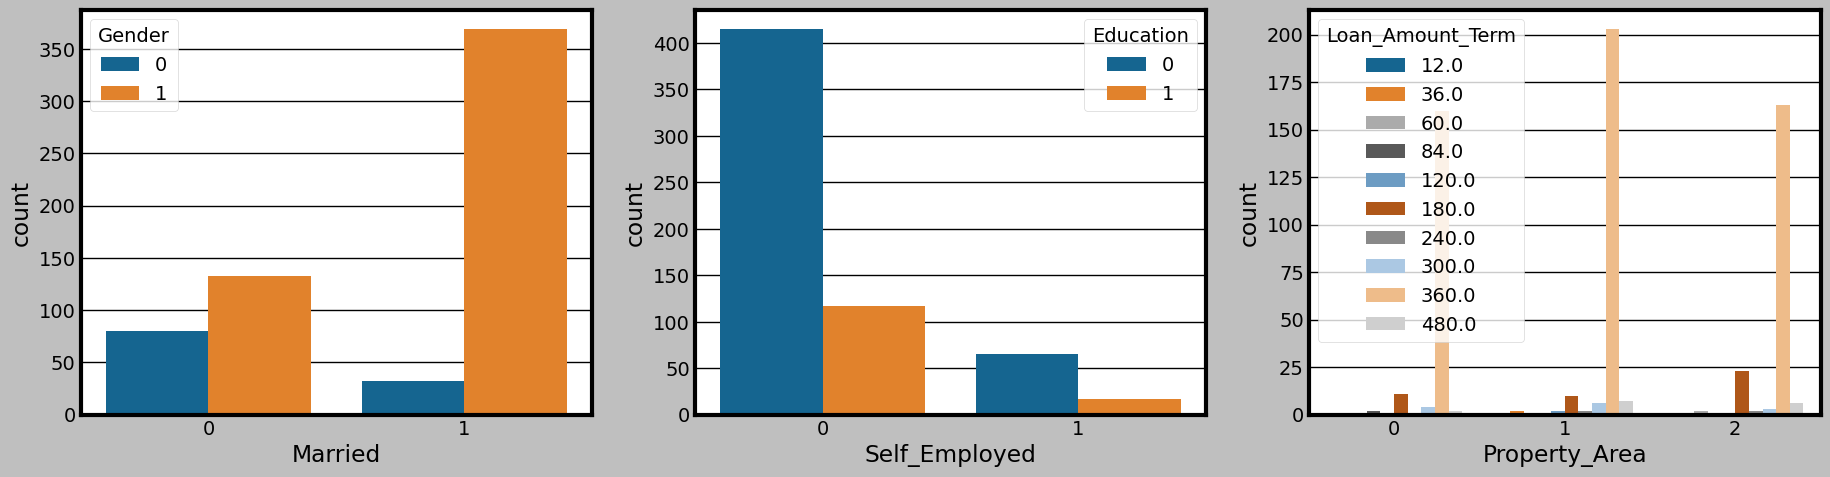

In [45]:
#visualising two colunms against each other
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.style.use('tableau-colorblind10')
sns.countplot(data=df,x='Married', hue='Gender')
plt.subplot(132)
sns.countplot(data=df,x='Self_Employed', hue='Education')
plt.subplot(133)
sns.countplot(data=df,x='Property_Area', hue='Loan_Amount_Term')

In [46]:
## Multivariate analysis

<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

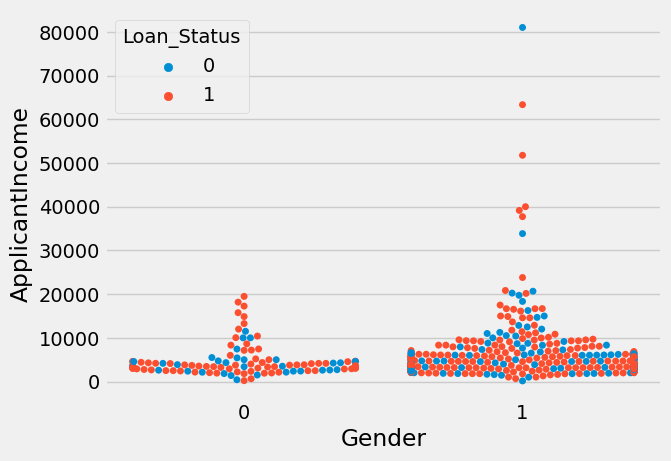

In [47]:
plt.style.use('fivethirtyeight')
sns.swarmplot(x=df["Gender"],y=df["ApplicantIncome"],hue=df["Loan_Status"])


In [48]:
## Heatmap

<Axes: >

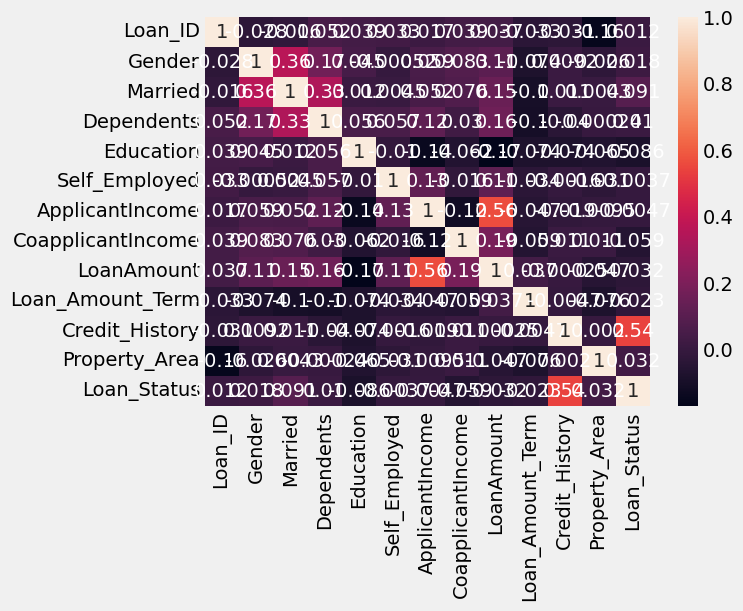

In [49]:
sns.heatmap(df.corr(),annot=True)

In [50]:
##performing  feature scaling op[eration using standard scaller on x  part of the dataset]
## there different type of values in the colums

In [51]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1.0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2.0,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3.0,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4.0,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [52]:
df.shape

(614, 13)

In [53]:
## Scalling the data

In [54]:
sc=StandardScaler()

In [55]:
x_bal=sc.fit_transform(x_bal)

In [56]:
names = x.columns

In [57]:
x_bal = pd.DataFrame(x_bal,columns=names)

In [58]:
## Splitting data into train and test

In [59]:
x_train, x_test, y_train,y_test = train_test_split(x_bal, y_bal, test_size=0.3, random_state=42)

**MODEL BUILDING**

In [60]:
##Decision tree model

In [61]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
yPred = dt.predict(x_test)
print('***DecisionTreeClassifier****')
print('Confusion matrix')
print(confusion_matrix(y_test,yPred))
print('Classification report')
print(classification_report(y_test,yPred))

***DecisionTreeClassifier****
Confusion matrix
[[82 20]
 [25 93]]
Classification report
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       102
           1       0.82      0.79      0.81       118

    accuracy                           0.80       220
   macro avg       0.79      0.80      0.79       220
weighted avg       0.80      0.80      0.80       220



In [62]:
##Random forest model

In [63]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
yPred=rf.predict(x_test)
print('***RandomForestClassifier****')
print('Confusion matrix')
print(confusion_matrix(y_test,rf.predict(x_test)))
print('Classification report')
print(classification_report(y_test,yPred))

***RandomForestClassifier****
Confusion matrix
[[ 81  21]
 [ 15 103]]
Classification report
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       102
           1       0.83      0.87      0.85       118

    accuracy                           0.84       220
   macro avg       0.84      0.83      0.83       220
weighted avg       0.84      0.84      0.84       220



In [64]:
##KNN model

In [65]:
print('***KNeighborsClassifier****')
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
yPred=knn.predict(x_test)
print('Confusion matrix')
print(confusion_matrix(y_test,knn.predict(x_test)))
print('Classification report')
print(classification_report(y_test,yPred))

***KNeighborsClassifier****
Confusion matrix
[[67 35]
 [22 96]]
Classification report
              precision    recall  f1-score   support

           0       0.75      0.66      0.70       102
           1       0.73      0.81      0.77       118

    accuracy                           0.74       220
   macro avg       0.74      0.74      0.74       220
weighted avg       0.74      0.74      0.74       220



Xgboost classifiers

In [66]:
xg = GradientBoostingClassifier()
xg.fit(x_train,y_train)
yPred=xg.predict(x_test)
print('***Gradient BoostingClassifier****')
print('Confusion matrix')
print(confusion_matrix(y_test,yPred))
print('Classification report')
print(classification_report (y_test,yPred))

***Gradient BoostingClassifier****
Confusion matrix
[[ 73  29]
 [ 14 104]]
Classification report
              precision    recall  f1-score   support

           0       0.84      0.72      0.77       102
           1       0.78      0.88      0.83       118

    accuracy                           0.80       220
   macro avg       0.81      0.80      0.80       220
weighted avg       0.81      0.80      0.80       220



In [67]:
## ANN model

In [68]:
# Importing the keras libraries and packages
import tensorflow as tf
from tensorflow.python import keras
from keras import layers
from keras.layers import Activation,Dense

In [69]:
#Initialising the ANN
classifier = keras.Sequential()

In [70]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=100, activation='relu', input_dim=11))

In [71]:
#Adding the second hidden layer.
classifier.add(Dense (units=50, activation='relu'))

In [72]:
# Adding the output layer
classifier.add(Dense (units=1, activation='sigmoid'))

In [73]:
#Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [74]:
## Fitting the ANN to the Training set
model_history = classifier.fit(x_train, y_train, batch_size=100, validation_split=0.2, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 55ms/step - loss: 0.6821 - accuracy: 0.5917 - val_loss: 0.6487 - val_accuracy: 0.6214
Epoch 2/100
5/5 [==============================] - 0s 8ms/step - loss: 0.6256 - accuracy: 0.6822 - val_loss: 0.6375 - val_accuracy: 0.6893
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 0.5901 - accuracy: 0.6968 - val_loss: 0.6152 - val_accuracy: 0.6796
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 0.5617 - accuracy: 0.7775 - val_loss: 0.5841 - val_accuracy: 0.7282
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 0.5332 - accuracy: 0.7922 - val_loss: 0.5559 - val_accuracy: 0.7573
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 0.5107 - accuracy: 0.7824 - val_loss: 0.5357 - val_accuracy: 0.7767
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 0.4933 - accuracy: 0.7848 - val_loss: 0.5252 - val_accuracy: 0.7864
Epoch 8/100
5/5 [=========

TESTING THE MODEL

In [75]:

#Gender Married Dependents Education S iielf Employed Applicant Income Coapplicant Income LoanAmount Loan Amount Term Credit History Property Area 
dt.predict([[1,0,0,0,0,5849,0,120,360,1,1,2]])

array([0])

In [76]:
#Gender Married Dependents Education welf Employed Applicant Income Coapplicant Income Loan Amount Loan Amount Term Credit History Property Area
xg.predict([[1,1, 0, 1, 1, 4276, 1542,145, 240, 0,1,1]])

array([0])

In [77]:
#Gender Married Dependents Education Self Employed Applicant Income Coapplicant Income LoanAmount Loan Amount Term Credit History Property Area 
rf.predict([[1,1, 0, 1, 1, 4276, 1542,145, 240, 0,1,1]])

array([0])

In [78]:
#Gender Married Dependents Education Self Employed Applicant Income Coapplicant Income Loan Amount Loan Amount Term Credit History Property Area
knn.predict([[1,1, 0, 1, 1, 4276, 1542,145, 240, 0,1,1]])

array([1])

In [79]:
classifier.save("loanh5")

In [80]:
results=classifier.evaluate(x_test,y_test,batch_size=128)
results

2/2 [==============================] - 0s 3ms/step - loss: 0.7053 - accuracy: 0.7727


[0.7053382396697998, 0.7727272510528564]

In [81]:
prediction=classifier.predict(x_test[:1])
prediction.shape

(1, 1)

In [82]:
# Predicting the Test set results 
ypred = classifier.predict(x_test)
ypred

array([[1.6877202e-02],
       [8.5030252e-01],
       [7.0809555e-01],
       [5.2392930e-01],
       [8.6640031e-04],
       [1.4073103e-08],
       [9.0126187e-01],
       [5.8486724e-01],
       [4.0227664e-03],
       [9.5223522e-01],
       [7.2208214e-01],
       [6.7242897e-01],
       [3.4068587e-01],
       [8.2254726e-01],
       [1.5083623e-05],
       [9.7155476e-01],
       [8.2146770e-01],
       [4.5314746e-06],
       [7.5451887e-01],
       [5.8667749e-01],
       [1.6729294e-01],
       [1.7028249e-06],
       [2.3631117e-05],
       [7.9521012e-01],
       [1.7617353e-06],
       [1.0680262e-05],
       [9.7177452e-01],
       [3.3524627e-06],
       [8.5550928e-01],
       [1.4511879e-06],
       [6.9036835e-01],
       [8.0331463e-01],
       [7.8008455e-01],
       [4.9692024e-03],
       [1.8137449e-02],
       [7.6294464e-01],
       [8.0226659e-05],
       [4.3800753e-02],
       [6.6776246e-02],
       [7.9270422e-01],
       [8.3465036e-04],
       [9.533707

In [83]:
ypred=(ypred > 0.5)
ypred

array([[False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [

In [84]:
def predict_exit(sample_value):
# Convert list to numpy array
    sample_value = np.array(sample_value)
# Reshape because sample value contains only 1 record 
    sample_value = sample_value.reshape(1, -1)
# Feature Scaling
    sample_value = sc.transform(sample_value)
    return classifier.predict(sample_value)

In [85]:
# Predictions
# Value order 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfPr
sample_value = [[1,1, 0, 1, 1, 4276, 1542,145, 240, 0,1,2]] 
if predict_exit(sample_value)>0.5:
   print("Prediction: High chance of Loan Approval!")
else:
   print("Prediction: Low chance Loan Approval.")

Prediction: High chance of Loan Approval!


In [86]:
# Predictions
# Value order "CreditScore', 'Age", "Tenure', 'Balance', 'NumOfProducts', 'HasCrCard, 'IsActiveMember', 'EstimatedSalary', 'France', 'Germany', 'Spain', 'Female',Male',
sample_value = [[1,0, 1, 1, 1, 4, 1544,45, 240, 1,1,2]]
if predict_exit(sample_value)>0.5:
   print("Prediction: High chance of Loan Approval!")
else:
   print("Prediction: Low chance of Loan Approval.")

Prediction: High chance of Loan Approval!


TASK-5

In [87]:
##comparing model accuracy

In [88]:
##comparing model accuracy before and after apllying hyperparameter tuning

In [89]:
from sklearn.model_selection import cross_val_score
#Random forest model is selected
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
yPred=rf.predict(x_test)

In [90]:
f1_score(y_test,yPred, average='weighted')

0.8041175322102782

In [91]:
cv=cross_val_score(rf,x,y,cv=5)

In [92]:
np.mean(cv)

0.767013194722111

MODEL DEPLOYMENT

In [93]:
from flask import Flask, render_template, request 
import pickle

In [94]:
#saving the model by using pickle functi
pickle.dump(rf,open("modelrf.pkl","wb"))

In [95]:
app=Flask (__name__)
model=pickle.load(open(r'modelrf.pkl', 'rb'))

In [96]:
@app.route('/') # rendering the html template 
def home():
    return render_template('home.html')